In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from skimage.io import imread, imshow


(128, 128, 4)
65536


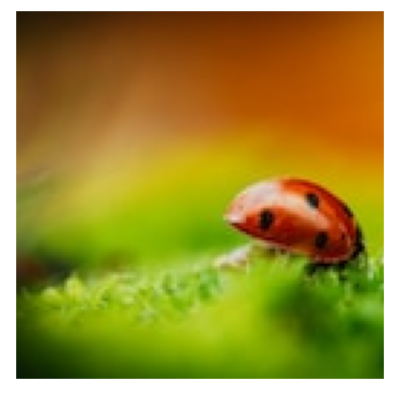

In [78]:
img = imread("safeimagekit.png")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img)
print(img.shape)
print(img.size)

In [79]:
X_img = np.reshape(img, (img.shape[0]*img.shape[1], 4))

In [80]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [81]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)
    
    return idx

In [82]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [83]:
def run_kMeans(X, initial_centroids, max_iters=10):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [87]:
K = 25
max_iters = 20
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/19
K-Means iteration 1/19
K-Means iteration 2/19
K-Means iteration 3/19
K-Means iteration 4/19
K-Means iteration 5/19
K-Means iteration 6/19
K-Means iteration 7/19
K-Means iteration 8/19
K-Means iteration 9/19
K-Means iteration 10/19
K-Means iteration 11/19
K-Means iteration 12/19
K-Means iteration 13/19
K-Means iteration 14/19
K-Means iteration 15/19
K-Means iteration 16/19
K-Means iteration 17/19
K-Means iteration 18/19
K-Means iteration 19/19


In [85]:
idx = find_closest_centroids(X_img, centroids)
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered,img.shape) 

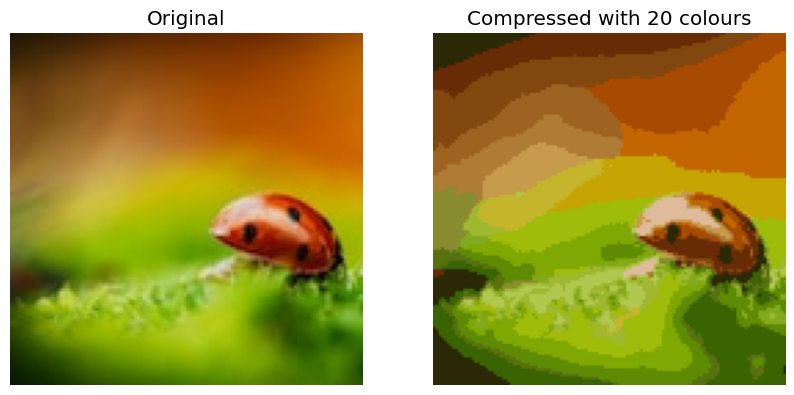

In [86]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_axis_off()


ax[1].imshow(X_recovered.astype('uint8'))
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()